<a href="https://colab.research.google.com/github/anjumanuel/digital-commerce-readiness/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving normalised2.csv to normalised2.csv


In [2]:
import pandas as pd
df = pd.read_csv("normalised2.csv")
df.head()


,state_name,broadband_rural,broadband_urban,urban_share,pmjdy_accounts_per_1000_pop,rupay_cards_per_account,avg_balance_per_account,literacy_rate,enrollment_per_1000_pop,enrollment_per_1000_HH,total_startups,msmes_per_1000_pop,population
0,ANDAMAN & NICOBAR ISLANDS,1.0000,0.7735,0.1399,0.5351,0.6397,0.1770,0.2017,0.3231,0.4438,0.5378,0.2005,1.0000
1,ANDHRA PRADESH,0.5099,1.0000,0.4023,0.2724,0.7235,0.1544,0.6552,0.3793,0.3973,1.0000,1.0000,0.5623
2,ARUNACHAL PRADESH,0.7056,0.3315,0.0145,0.7200,0.7737,0.0793,0.0000,0.2296,0.2896,0.1141,0.1206,0.5208
3,ASSAM,0.3772,0.5026,0.2497,0.6800,0.5587,0.1230,0.5027,0.2741,0.2783,0.1849,0.1653,0.4566
4,BIHAR,0.4540,0.5324,0.2667,0.2696,0.5447,0.0240,0.2763,0.3632,0.3197,0.0913,0.2941,0.4231


In [3]:

features_df = df.drop(columns=['state_name'])
features_df.head()

,broadband_rural,broadband_urban,urban_share,pmjdy_accounts_per_1000_pop,rupay_cards_per_account,avg_balance_per_account,literacy_rate,enrollment_per_1000_pop,enrollment_per_1000_HH,total_startups,msmes_per_1000_pop,population
0,1.0000,0.7735,0.1399,0.5351,0.6397,0.1770,0.2017,0.3231,0.4438,0.5378,0.2005,1.0000
1,0.5099,1.0000,0.4023,0.2724,0.7235,0.1544,0.6552,0.3793,0.3973,1.0000,1.0000,0.5623
2,0.7056,0.3315,0.0145,0.7200,0.7737,0.0793,0.0000,0.2296,0.2896,0.1141,0.1206,0.5208
3,0.3772,0.5026,0.2497,0.6800,0.5587,0.1230,0.5027,0.2741,0.2783,0.1849,0.1653,0.4566
4,0.4540,0.5324,0.2667,0.2696,0.5447,0.0240,0.2763,0.3632,0.3197,0.0913,0.2941,0.4231


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_df)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_components = pca.fit_transform(features_scaled)

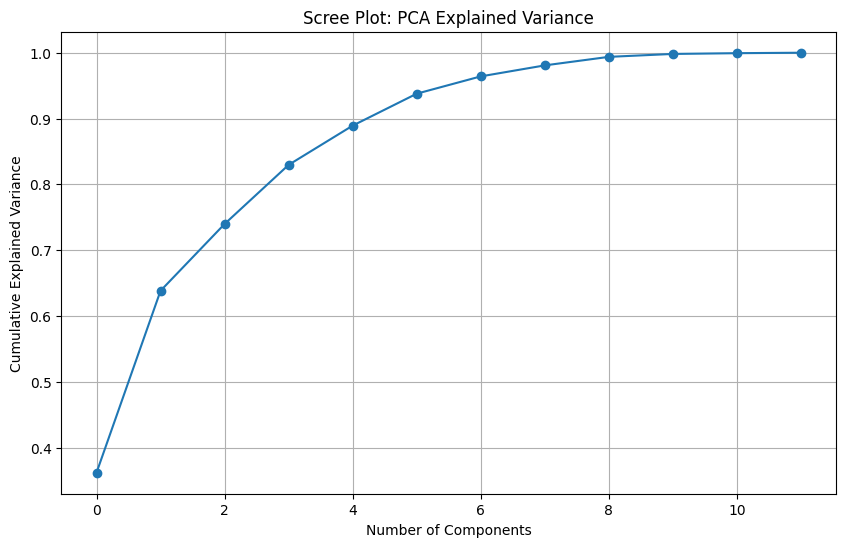

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid(True)
plt.show()

In [7]:
# 1. Keep only the top 4 components
from sklearn.decomposition import PCA

# Re-initialize PCA with 4 components
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(pca_components)  # X_scaled is your standardized data (no state_name column)

# 2. Create a new DataFrame with PCA results
pca_df = pd.DataFrame(X_pca_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['state_name'] = df['state_name'].values  # Add back state names

# 3. Optionally: Compute a single DCRI score (weighted sum of 4 PCs)
# You can use explained variance as weights
weights = pca_4.explained_variance_ratio_
dcri_weights = weights / weights.sum()  # Normalize (should already sum to 1 for n_components=4)

# DCRI = weighted sum of PC1 to PC4
pca_df['DCRI'] = (
    pca_df['PC1'] * dcri_weights[0] +
    pca_df['PC2'] * dcri_weights[1] +
    pca_df['PC3'] * dcri_weights[2] +
    pca_df['PC4'] * dcri_weights[3]
)
pca_df

,PC1,PC2,PC3,PC4,state_name,DCRI
0,1.279122,0.442582,-0.173741,-0.238013,ANDAMAN & NICOBAR ISLANDS,0.658294
1,0.503844,1.207540,-0.225246,-0.098787,ANDHRA PRADESH,0.583899
2,0.984009,-0.261409,0.052249,0.130726,ARUNACHAL PRADESH,0.362560
3,0.576477,-0.057690,-0.107142,-0.237243,ASSAM,0.193379
4,0.487243,0.032559,-0.055346,-0.154851,BIHAR,0.199799
5,0.633937,0.048535,0.143292,0.116351,CHANDIGARH,0.322767
6,0.056060,0.623367,-0.086595,0.018838,CHHATTISGARH,0.223637
7,0.450634,0.114960,0.209589,0.299625,DADRA & NAGAR HAVELI,0.292923
8,0.252266,0.384122,-0.077819,-0.167510,DAMAN & DIU,0.210367
9,0.187737,0.448848,-0.192843,0.171142,GOA,0.226394


**Clustering: Use K-Means on the 4 PCs to group states.**

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
X = pca_df[['PC1', 'PC2', 'PC3', 'PC4']]

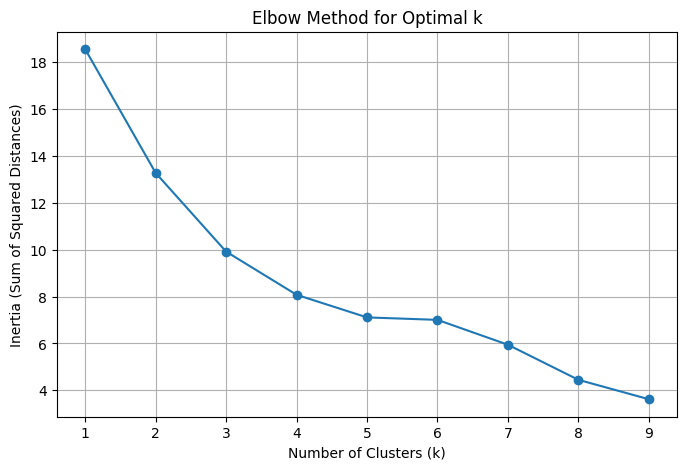

In [10]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(X)

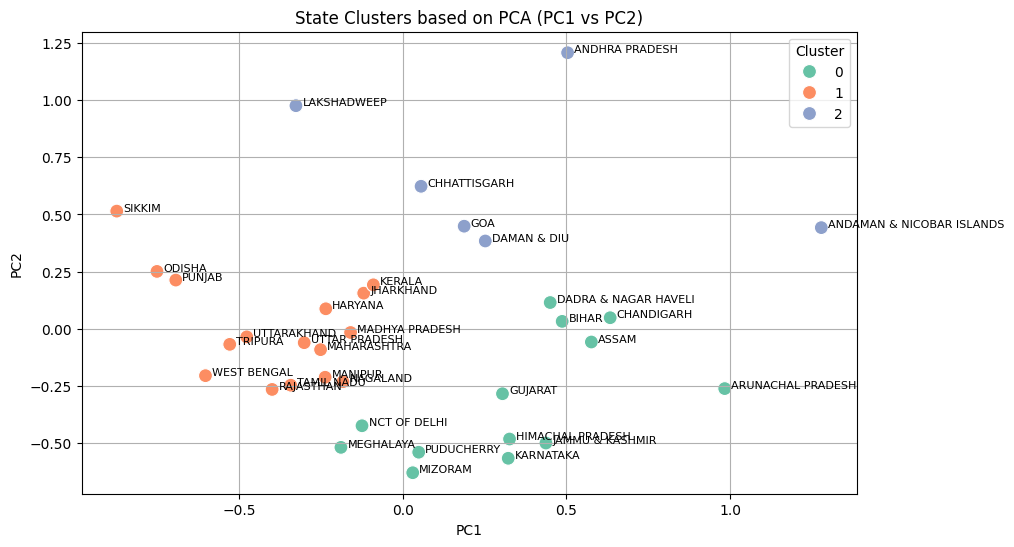

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PC1[i]+0.02, pca_df.PC2[i], pca_df.state_name[i], fontsize=8)
plt.title('State Clusters based on PCA (PC1 vs PC2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [13]:
pca_df[['state_name', 'DCRI', 'cluster']].sort_values(by='cluster')

,state_name,DCRI,cluster
3,ASSAM,0.193379,0
2,ARUNACHAL PRADESH,0.362560,0
5,CHANDIGARH,0.322767,0
4,BIHAR,0.199799,0
7,DADRA & NAGAR HAVELI,0.292923,0
13,JAMMU & KASHMIR,0.049505,0
15,KARNATAKA,-0.033377,0
10,GUJARAT,0.057076,0
12,HIMACHAL PRADESH,0.016160,0
26,PUDUCHERRY,-0.132592,0


In [36]:
# Standardize state names to upper case in both DataFrames
pca_df['state_name'] = pca_df['state_name'].str.upper()
df['state_name'] = df['state_name'].str.upper()

# Then merge
df_merged = pd.merge(pca_df, df, on='state_name', how='inner')
df_merged

,PC1,PC2,PC3,PC4,state_name,DCRI,cluster,broadband_rural,broadband_urban,urban_share,pmjdy_accounts_per_1000_pop,rupay_cards_per_account,avg_balance_per_account,literacy_rate,enrollment_per_1000_pop,enrollment_per_1000_HH,total_startups,msmes_per_1000_pop,population
0,1.279122,0.442582,-0.173741,-0.238013,ANDAMAN & NICOBAR ISLANDS,0.658294,2,1.0000,0.7735,0.1399,0.5351,0.6397,0.1770,0.2017,0.3231,0.4438,0.5378,0.2005,1.0000
1,0.503844,1.207540,-0.225246,-0.098787,ANDHRA PRADESH,0.583899,2,0.5099,1.0000,0.4023,0.2724,0.7235,0.1544,0.6552,0.3793,0.3973,1.0000,1.0000,0.5623
2,0.984009,-0.261409,0.052249,0.130726,ARUNACHAL PRADESH,0.362560,0,0.7056,0.3315,0.0145,0.7200,0.7737,0.0793,0.0000,0.2296,0.2896,0.1141,0.1206,0.5208
3,0.576477,-0.057690,-0.107142,-0.237243,ASSAM,0.193379,0,0.3772,0.5026,0.2497,0.6800,0.5587,0.1230,0.5027,0.2741,0.2783,0.1849,0.1653,0.4566
4,0.487243,0.032559,-0.055346,-0.154851,BIHAR,0.199799,0,0.4540,0.5324,0.2667,0.2696,0.5447,0.0240,0.2763,0.3632,0.3197,0.0913,0.2941,0.4231
5,0.633937,0.048535,0.143292,0.116351,CHANDIGARH,0.322767,0,0.4375,0.4921,0.2012,0.7350,0.8380,0.0643,0.2535,0.3583,0.3931,0.1823,0.3697,0.3633
6,0.056060,0.623367,-0.086595,0.018838,CHHATTISGARH,0.223637,2,0.2563,0.5889,0.4386,0.1436,0.7765,0.0519,0.6338,0.4287,0.3779,0.3787,0.8473,0.3609
7,0.450634,0.114960,0.209589,0.299625,DADRA & NAGAR HAVELI,0.292923,0,0.3793,0.3384,0.1696,0.6049,0.8296,0.1882,0.1598,0.3648,0.4506,0.1992,0.6438,0.3429
8,0.252266,0.384122,-0.077819,-0.167510,DAMAN & DIU,0.210367,2,0.3002,0.4703,0.3274,0.2903,0.4916,0.1680,0.4763,0.3710,0.3862,0.5953,0.5970,0.3055
9,0.187737,0.448848,-0.192843,0.171142,GOA,0.226394,2,0.2843,0.4828,0.3723,0.2643,0.8771,0.1816,0.5195,0.2734,0.3074,0.4673,0.7102,0.3023


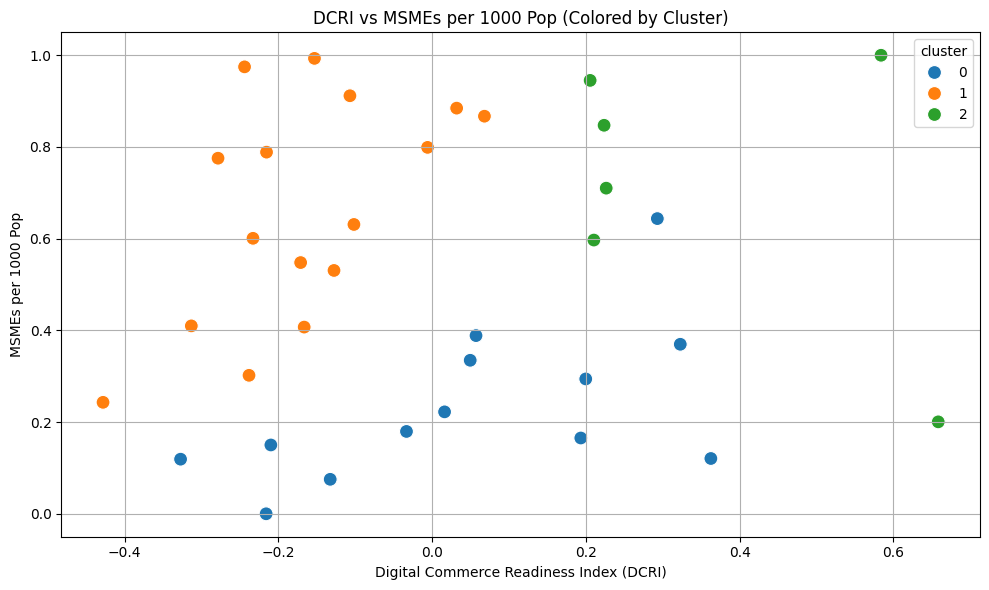

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged,
    x='DCRI',
    y='msmes_per_1000_pop',
    hue='cluster',
    palette='tab10',
    s=100
)
plt.title('DCRI vs MSMEs per 1000 Pop (Colored by Cluster)')
plt.xlabel('Digital Commerce Readiness Index (DCRI)')
plt.ylabel('MSMEs per 1000 Pop')
plt.grid(True)
plt.tight_layout()
plt.show()


#**VISUALISATIONS**


Heatmap of All Normalized Indicators

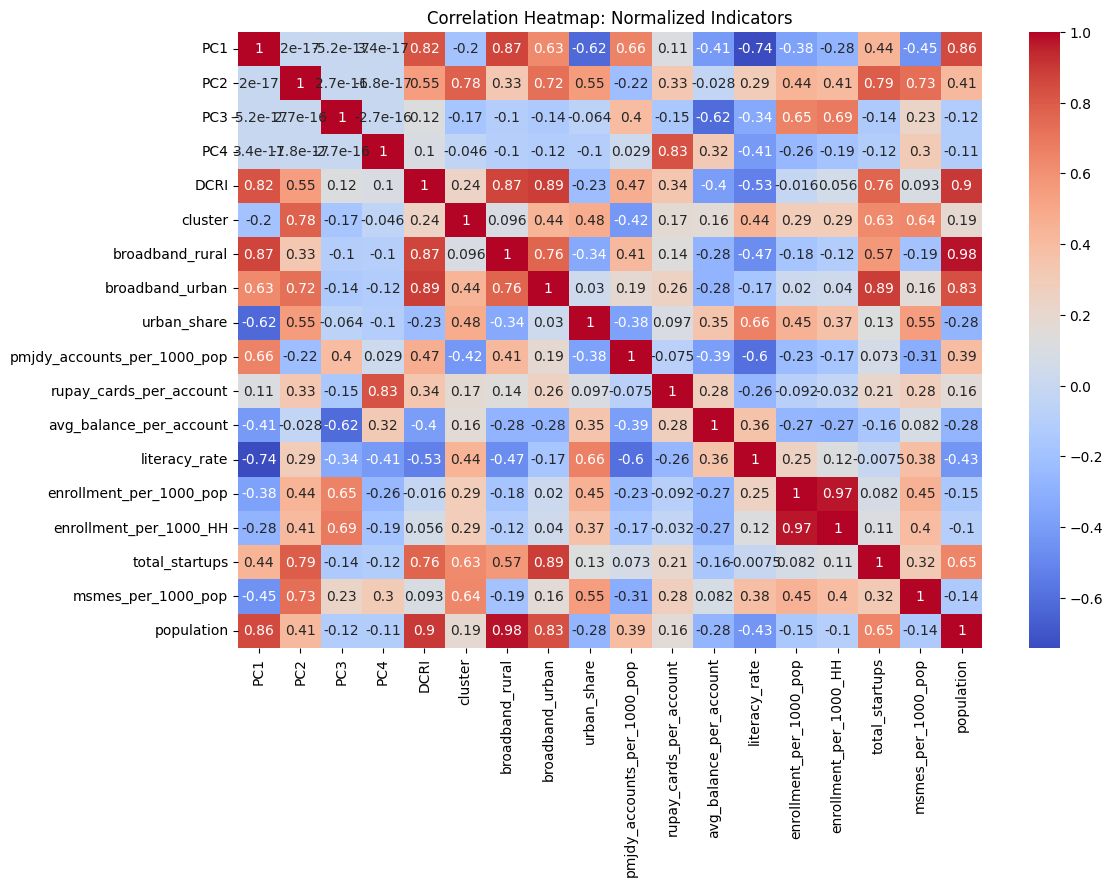

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df2=df_merged.drop(columns=['state_name'])
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Normalized Indicators")
plt.show()


Education, MSMEs, Startups

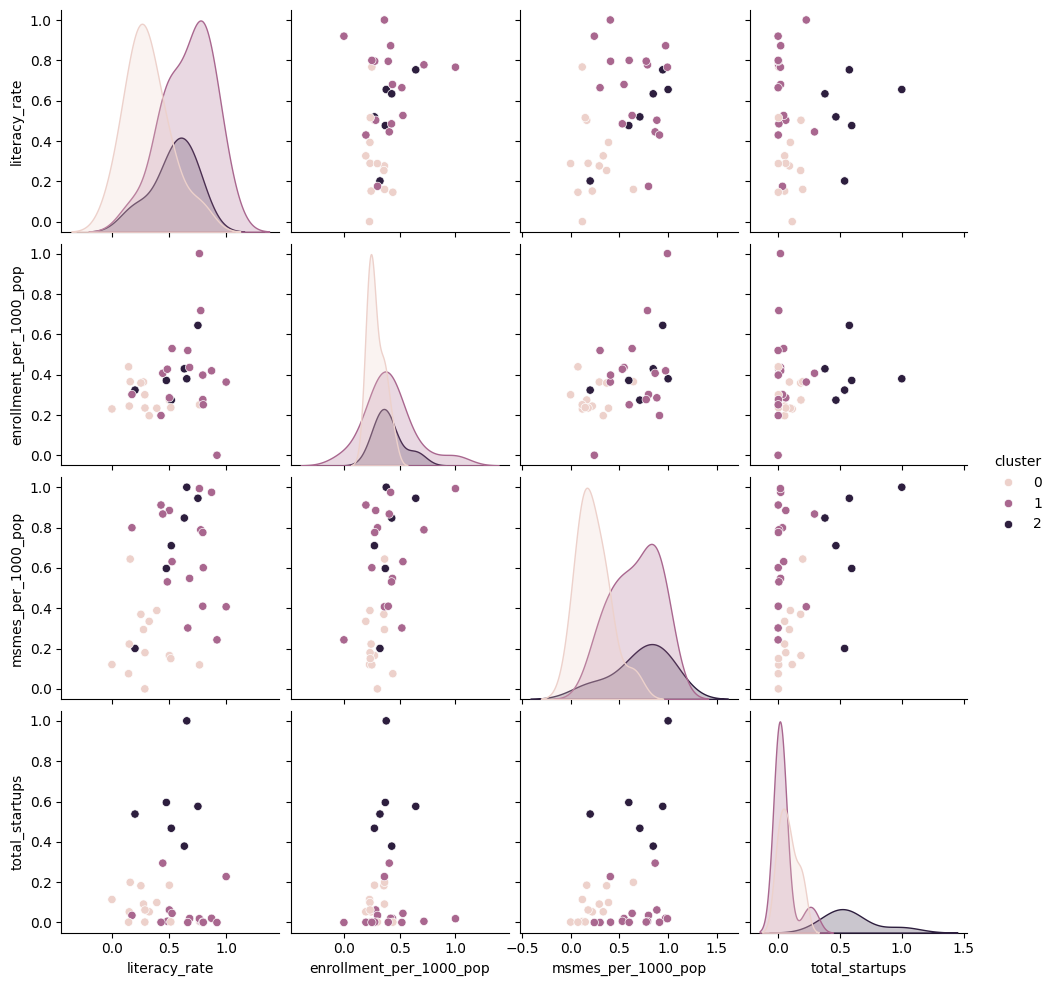

In [17]:
sns.pairplot(df_merged, vars=["literacy_rate", "enrollment_per_1000_pop", "msmes_per_1000_pop", "total_startups"], hue="cluster")

DCRI Scores by State

Text(0.5, 1.0, 'Digital Commerce Readiness Index (DCRI) by State')

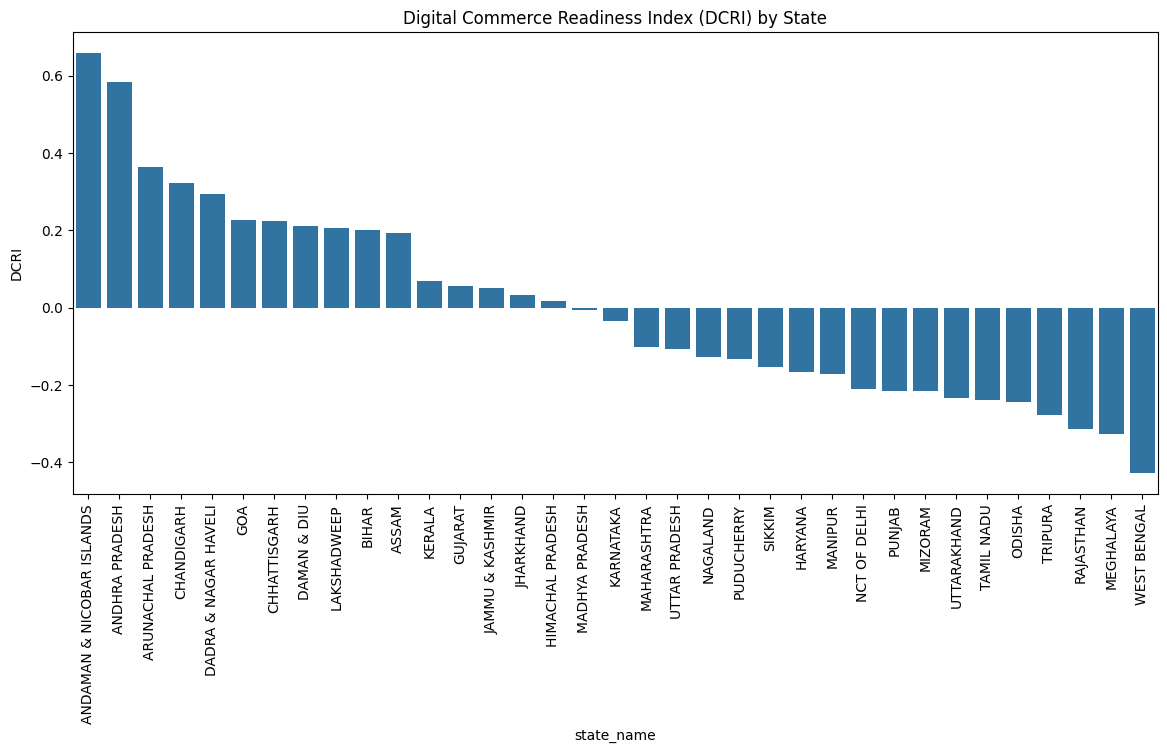

In [18]:
df_sorted = df_merged.sort_values("DCRI", ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x="state_name", y="DCRI", data=df_sorted)
plt.xticks(rotation=90)
plt.title("Digital Commerce Readiness Index (DCRI) by State")


Financial Inclusion Dimensions

In [19]:
import plotly.express as px

fig = px.scatter(df_merged, x="rupay_cards_per_account", y="avg_balance_per_account",
                 size="pmjdy_accounts_per_1000_pop", color="state_name", hover_name="state_name",
                 title="Financial Inclusion Bubble Chart")
fig.show()


PCA Dimensions

Text(0.5, 1.0, 'State Clusters by PCA Components')

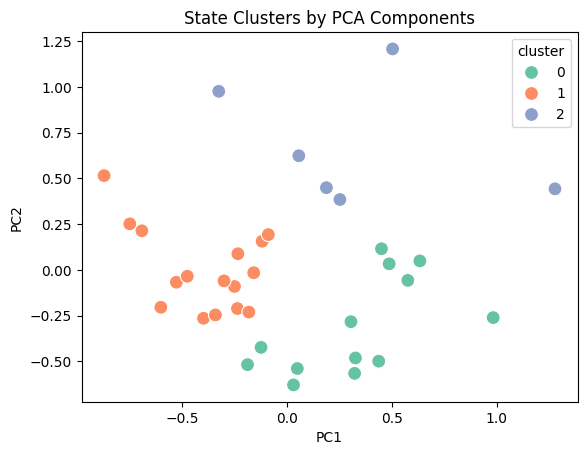

In [20]:
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=df_merged, palette="Set2", s=100)
plt.title("State Clusters by PCA Components")


DCRI Distribution per Cluster

Text(0.5, 1.0, 'DCRI Score Distribution by Cluster')

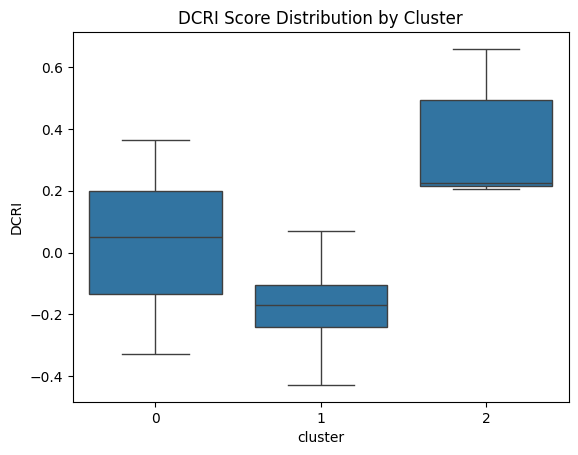

In [21]:
sns.boxplot(x="cluster", y="DCRI", data=df_merged)
plt.title("DCRI Score Distribution by Cluster")


Top States by Startups & MSMEs

Text(0.5, 1.0, 'Top 10 States by Normalized Startup Score')

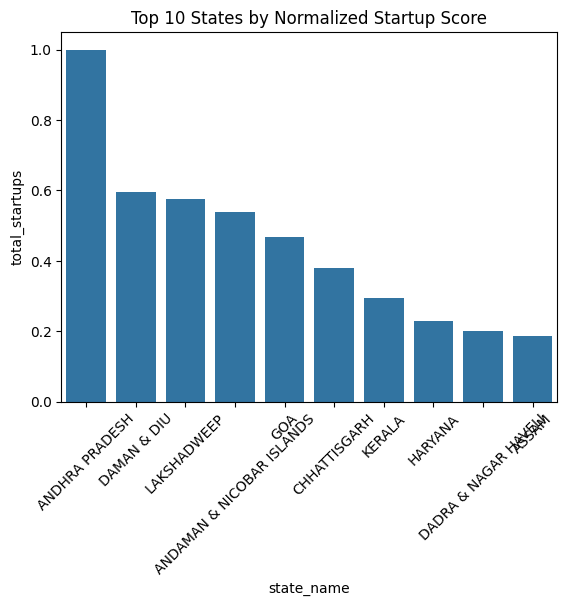

In [22]:
top_startups = df_merged.sort_values("total_startups", ascending=False).head(10)
sns.barplot(x="state_name", y="total_startups", data=top_startups)
plt.xticks(rotation=45)
plt.title("Top 10 States by Normalized Startup Score")


Discrepancy Between Readiness and Entrepreneurship

Text(0.5, 1.0, 'Difference between Readiness (DCRI) and Entrepreneurship (Startups)')

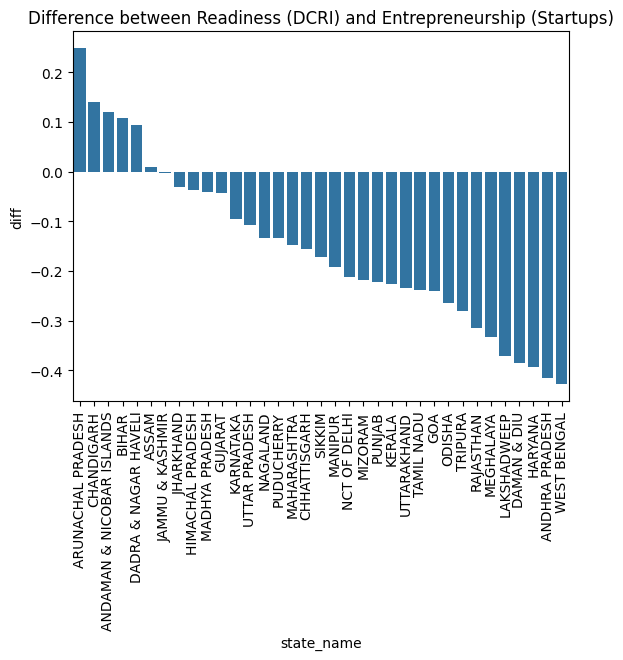

In [23]:
df_merged["diff"] = df_merged["DCRI"] - df_merged["total_startups"]
df_sorted = df_merged.sort_values("diff", ascending=False)
sns.barplot(x="state_name", y="diff", data=df_sorted)
plt.xticks(rotation=90)
plt.title("Difference between Readiness (DCRI) and Entrepreneurship (Startups)")


Census + MSME Insights



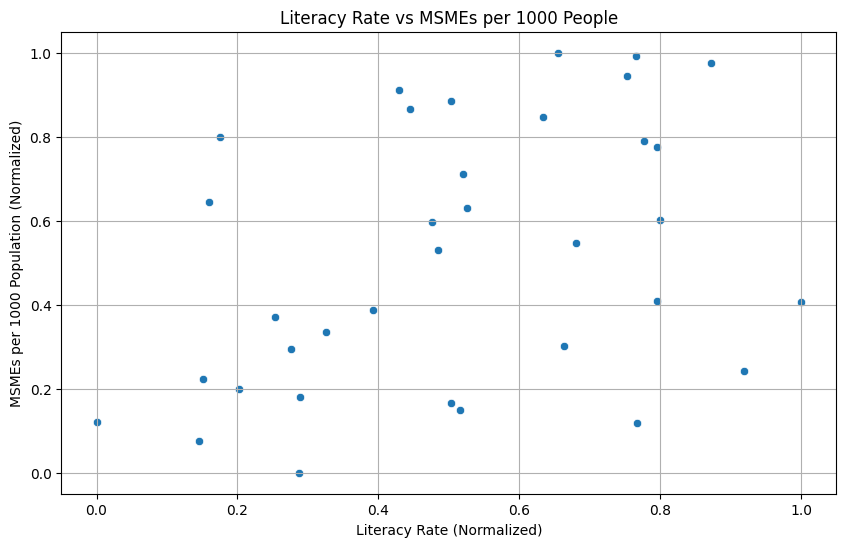

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='literacy_rate', y='msmes_per_1000_pop')
plt.title('Literacy Rate vs MSMEs per 1000 People')
plt.xlabel('Literacy Rate (Normalized)')
plt.ylabel('MSMEs per 1000 Population (Normalized)')
plt.grid(True)
plt.show()


PMJDY & Financial Inclusion


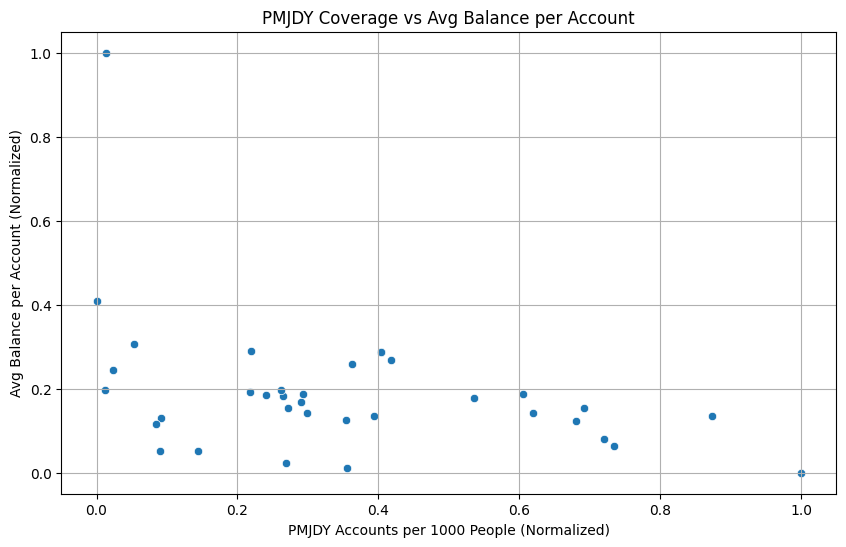

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pmjdy_accounts_per_1000_pop', y='avg_balance_per_account')
plt.title('PMJDY Coverage vs Avg Balance per Account')
plt.xlabel('PMJDY Accounts per 1000 People (Normalized)')
plt.ylabel('Avg Balance per Account (Normalized)')
plt.grid(True)
plt.show()


AISHE – Enrollment & Higher Education

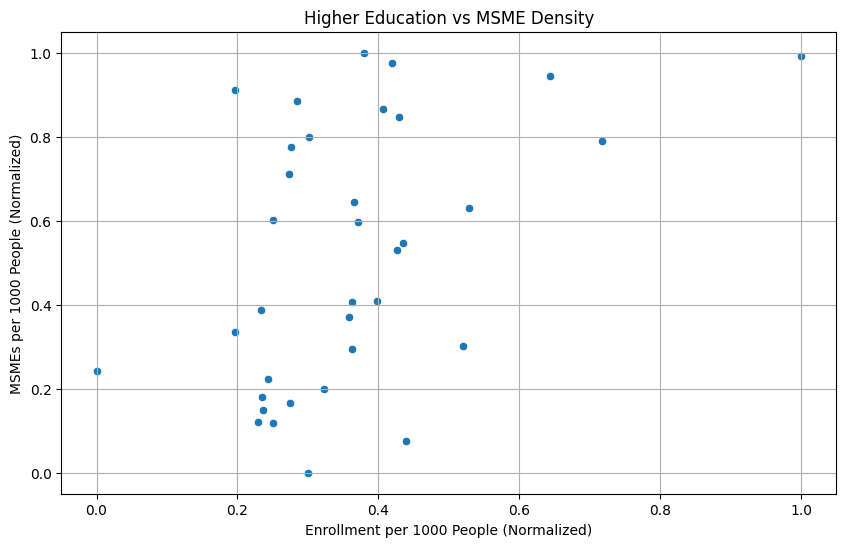

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enrollment_per_1000_pop', y='msmes_per_1000_pop')
plt.title('Higher Education vs MSME Density')
plt.xlabel('Enrollment per 1000 People (Normalized)')
plt.ylabel('MSMEs per 1000 People (Normalized)')
plt.grid(True)
plt.show()


TRAI – Broadband Access and Growth

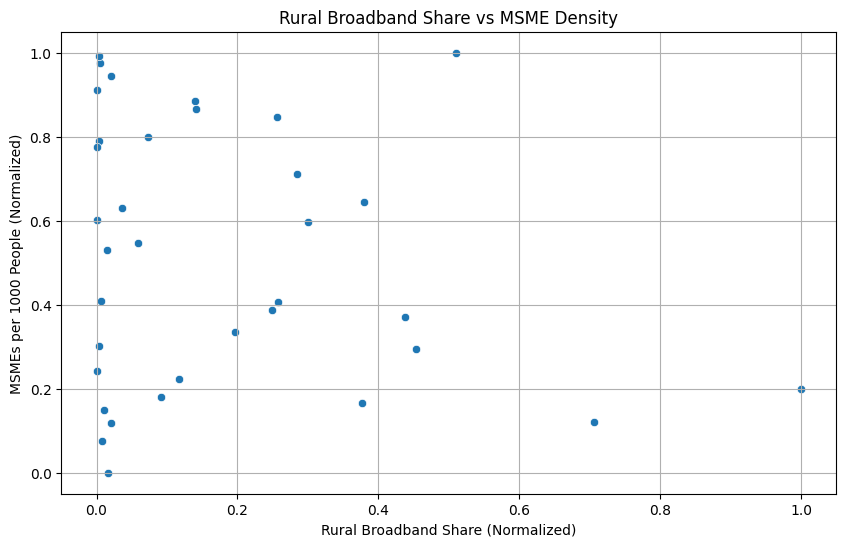

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='broadband_rural', y='msmes_per_1000_pop')
plt.title('Rural Broadband Share vs MSME Density')
plt.xlabel('Rural Broadband Share (Normalized)')
plt.ylabel('MSMEs per 1000 People (Normalized)')
plt.grid(True)
plt.show()


Startup and MSME Distribution

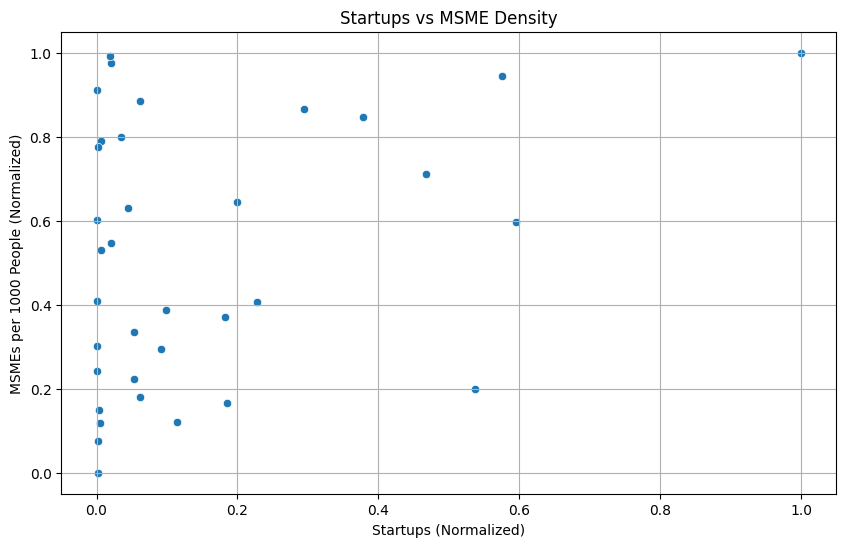

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_startups', y='msmes_per_1000_pop')
plt.title('Startups vs MSME Density')
plt.xlabel('Startups (Normalized)')
plt.ylabel('MSMEs per 1000 People (Normalized)')
plt.grid(True)
plt.show()


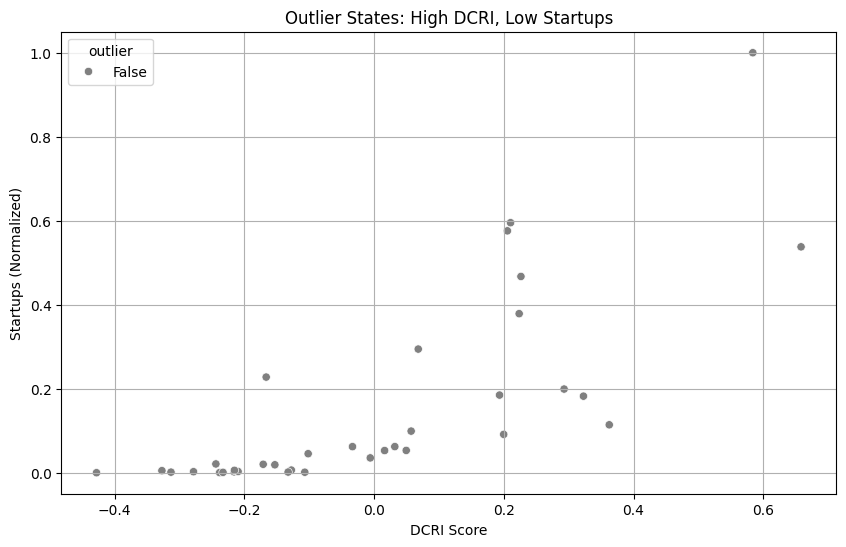

In [29]:
# Define outliers as high DCRI but low startup density
high_dcri = df_merged['DCRI'] > df_merged['DCRI'].quantile(0.75)
low_startups = df_merged['total_startups'] < df_merged['total_startups'].quantile(0.25)
df_merged['outlier'] = high_dcri & low_startups

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='DCRI', y='total_startups', hue='outlier', palette={True: 'red', False: 'gray'})
plt.title('Outlier States: High DCRI, Low Startups')
plt.xlabel('DCRI Score')
plt.ylabel('Startups (Normalized)')
plt.grid(True)
plt.show()


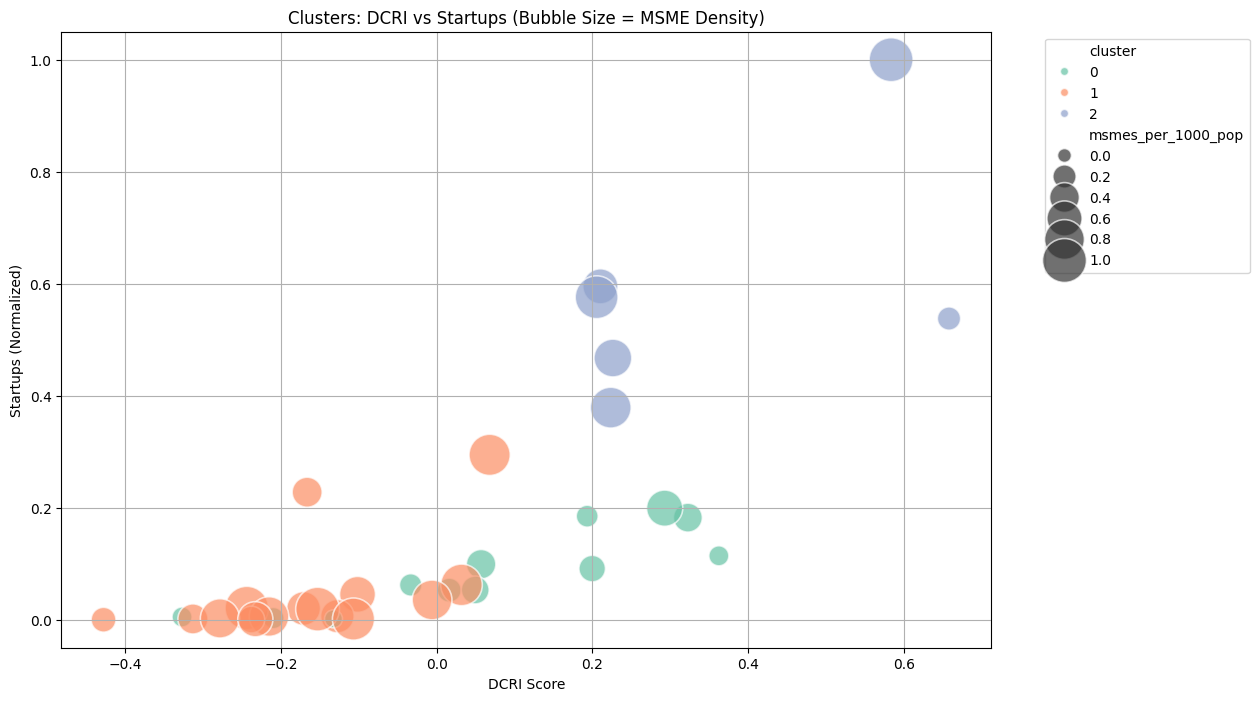

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_merged, x='DCRI', y='total_startups', size='msmes_per_1000_pop', hue='cluster', sizes=(100, 1000), alpha=0.7, palette='Set2')
plt.title('Clusters: DCRI vs Startups (Bubble Size = MSME Density)')
plt.xlabel('DCRI Score')
plt.ylabel('Startups (Normalized)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
